In [1]:
# Load libraries

import pandas as pd
import statsmodels.api as sm
import numpy as np

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
from __future__ import division
import seaborn as sns

In [2]:
df = pd.read_csv('Data/demographic_dv_data.csv')

In [3]:
reg_df = df.dropna()

In [4]:
reg_df

,precinct,total_complaints_17,total_complaints_17_per_capita,total_complaints_18,total_complaints_18_per_capita,total_complaints_19,total_complaints_19_per_capita,avg_population,avg_complaints_17_19,avg_median_income,avg_unemployment_rate,avg_white_frac,avg_black_frac,avg_native_frac,avg_asian_frac,avg_single_frac,avg_liveswspouse_frac,avg_liveswunmarried_frac,avg_bachelors_frac,avg_blacks_1990
0,1.0,504,0.755860,542,0.812850,510,0.764859,66679,0.777856,173781.727273,0.031593,0.703872,0.037305,0.001290,0.207777,0.228813,0.414600,0.062289,0.395121,615.200000
2,6.0,306,0.491756,279,0.448366,332,0.533539,62226,0.491220,133501.000000,0.050877,0.889237,0.013940,0.000000,0.048247,0.381976,0.285970,0.124497,0.448389,1176.000000
3,7.0,1312,2.328099,1285,2.280188,1378,2.445213,56355,2.351167,36982.000000,0.062193,0.320211,0.089086,0.009721,0.418883,0.223851,0.309844,0.029628,0.222559,9321.000000
4,9.0,1338,1.750324,1226,1.603809,1326,1.734626,76443,1.696253,90939.000000,0.044064,0.684918,0.070973,0.001351,0.143445,0.322573,0.276632,0.078682,0.404349,4804.500000
5,10.0,838,1.669988,822,1.638103,831,1.656038,50180,1.654710,138272.000000,0.036067,0.805502,0.044365,0.001461,0.087830,0.395188,0.303889,0.112008,0.412710,3171.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,115.0,2749,1.602205,2730,1.591132,2593,1.511284,171576,1.568207,59516.333333,0.051435,0.408196,0.114146,0.006384,0.189568,0.115032,0.378341,0.043476,0.143989,4061.500000
73,120.0,4640,4.105904,4642,4.107674,4265,3.774069,113008,3.995882,69063.500000,0.042361,0.600461,0.224943,0.002034,0.060278,0.145980,0.438328,0.045523,0.199319,5643.000000
74,121.0,3030,2.552482,2782,2.343566,2612,2.200357,118708,2.365468,74938.666667,0.044689,0.595667,0.199929,0.005083,0.113643,0.092653,0.460973,0.038530,0.187815,2796.666667
75,122.0,2119,1.524658,2057,1.480048,2029,1.459901,138982,1.488202,79450.500000,0.054905,0.746309,0.102512,0.001811,0.095711,0.106724,0.493980,0.033405,0.196255,2479.500000


In [5]:
from scipy import stats
import matplotlib.pyplot as plt

r value =  0.7371110245271122
p value =  6.998862195431052e-14


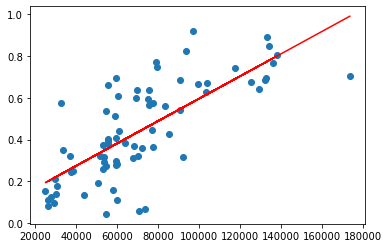

In [6]:
# how heavily correlated is income and race?

res = stats.linregress(reg_df['avg_median_income'], reg_df['avg_white_frac'])
print('r value = ', res.rvalue)
print('p value = ', res.pvalue)
plt.scatter(reg_df['avg_median_income'], reg_df['avg_white_frac'])
plt.plot(reg_df['avg_median_income'], res.intercept + res.slope*reg_df['avg_median_income'], 'r', label='fitted line')

r value =  -0.776950403005871
p value =  4.0584642410934427e-16


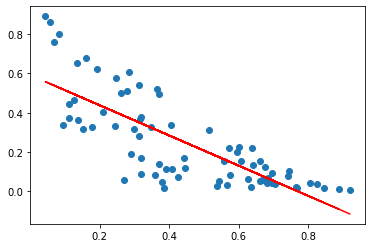

In [7]:
res = stats.linregress(reg_df['avg_white_frac'], reg_df['avg_black_frac'])
print('r value = ', res.rvalue)
print('p value = ', res.pvalue)
plt.scatter(reg_df['avg_white_frac'], reg_df['avg_black_frac'])
plt.plot(reg_df['avg_white_frac'], res.intercept + res.slope*reg_df['avg_white_frac'], 'r', label='fitted line')

r value =  -0.776950403005871
p value =  4.0584642410934427e-16


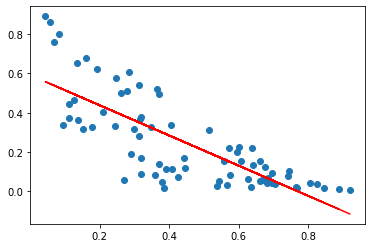

In [8]:
res = stats.linregress(reg_df['avg_white_frac'], reg_df['avg_black_frac'])
print('r value = ', res.rvalue)
print('p value = ', res.pvalue)
plt.scatter(reg_df['avg_white_frac'], reg_df['avg_black_frac'])
plt.plot(reg_df['avg_white_frac'], res.intercept + res.slope*reg_df['avg_white_frac'], 'r', label='fitted line')

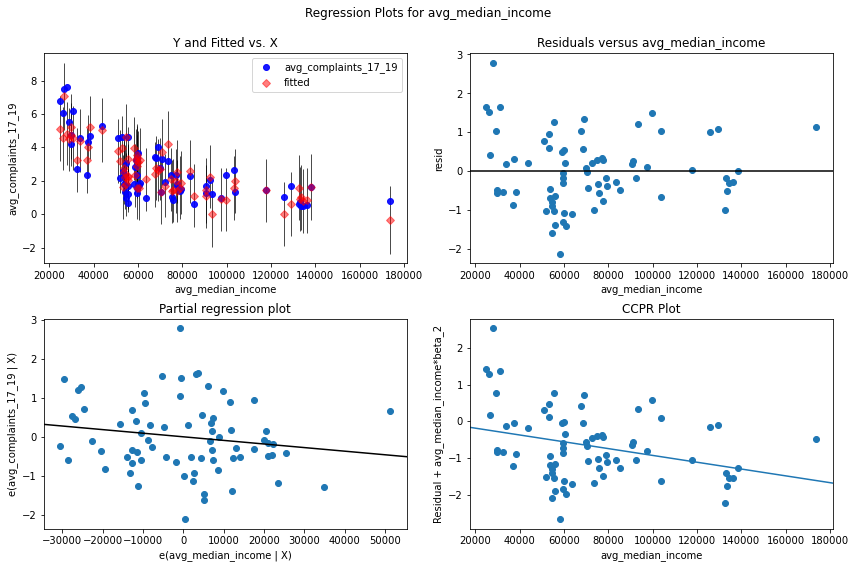

In [9]:
# plotting residuals for homoskedasticity

lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_black_frac + avg_median_income + avg_single_frac + avg_bachelors_frac', data=reg_df).fit()
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(lin_reg, 'avg_median_income', fig=fig)
                                              
                                              

In [10]:
# Preprocessing data to prevent heterosk

from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()
reg_df_scaled = pd.DataFrame(ss.fit_transform(reg_df),columns = reg_df.columns)

## our main regression

In [14]:
lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_bachelors_frac + avg_single_frac + avg_black_frac', data=reg_df_scaled).fit(cov_type='HC1')
print(lin_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.720
Model:                              OLS   Adj. R-squared:                  0.708
Method:                   Least Squares   F-statistic:                     48.79
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):           3.93e-17
Time:                          18:31:21   Log-Likelihood:                -57.909
No. Observations:                    74   AIC:                             123.8
Df Residuals:                        70   BIC:                             133.0
Df Model:                             3                                         
Covariance Type:                    HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

## Using white fraction instead of black fraction

In [31]:
lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_bachelors_frac + avg_single_frac + avg_white_frac', data=reg_df_scaled).fit(cov_type='HC1')
print(lin_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.691
Model:                              OLS   Adj. R-squared:                  0.678
Method:                   Least Squares   F-statistic:                     44.55
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):           3.22e-16
Time:                          19:05:42   Log-Likelihood:                -61.492
No. Observations:                    74   AIC:                             131.0
Df Residuals:                        70   BIC:                             140.2
Df Model:                             3                                         
Covariance Type:                    HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

## Using Native, then asian fractions.

In [34]:
## Native is not significant

lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_bachelors_frac + avg_single_frac + avg_native_frac', data=reg_df_scaled).fit(cov_type='HC1')
print(lin_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.657
Model:                              OLS   Adj. R-squared:                  0.642
Method:                   Least Squares   F-statistic:                     39.60
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):           4.46e-15
Time:                          19:06:46   Log-Likelihood:                -65.431
No. Observations:                    74   AIC:                             138.9
Df Residuals:                        70   BIC:                             148.1
Df Model:                             3                                         
Covariance Type:                    HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [35]:
lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_bachelors_frac + avg_single_frac + avg_asian_frac', data=reg_df_scaled).fit(cov_type='HC1')
print(lin_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.734
Model:                              OLS   Adj. R-squared:                  0.723
Method:                   Least Squares   F-statistic:                     57.15
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):           8.65e-19
Time:                          19:06:53   Log-Likelihood:                -56.002
No. Observations:                    74   AIC:                             120.0
Df Residuals:                        70   BIC:                             129.2
Df Model:                             3                                         
Covariance Type:                    HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

# Tried adding median income, but it's statistically insignificant.

In [28]:
lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_black_frac + avg_median_income + avg_single_frac + avg_bachelors_frac', data=reg_df_scaled).fit(cov_type='HC1')
print(lin_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.728
Model:                              OLS   Adj. R-squared:                  0.712
Method:                   Least Squares   F-statistic:                     37.83
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):           9.95e-17
Time:                          18:49:02   Log-Likelihood:                -56.879
No. Observations:                    74   AIC:                             123.8
Df Residuals:                        69   BIC:                             135.3
Df Model:                             4                                         
Covariance Type:                    HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

### What if we tried to use fraction of people living with their spouse instead of living alone? And fraction of people living with someone they're not married to?

In [29]:
lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_black_frac + avg_liveswspouse_frac + avg_bachelors_frac', data=reg_df_scaled).fit(cov_type='HC1')
print(lin_reg.summary())



                             OLS Regression Results                             
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.701
Model:                              OLS   Adj. R-squared:                  0.688
Method:                   Least Squares   F-statistic:                     41.01
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):           2.08e-15
Time:                          18:50:10   Log-Likelihood:                -60.301
No. Observations:                    74   AIC:                             128.6
Df Residuals:                        70   BIC:                             137.8
Df Model:                             3                                         
Covariance Type:                    HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [30]:
lin_reg = sm.OLS.from_formula('avg_complaints_17_19 ~ avg_black_frac + avg_liveswspouse_frac + avg_bachelors_frac', data=reg_df_scaled).fit(cov_type='HC1')
print(lin_reg.summary())

                             OLS Regression Results                             
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.701
Model:                              OLS   Adj. R-squared:                  0.688
Method:                   Least Squares   F-statistic:                     41.01
Date:                  Tue, 07 Dec 2021   Prob (F-statistic):           2.08e-15
Time:                          18:50:21   Log-Likelihood:                -60.301
No. Observations:                    74   AIC:                             128.6
Df Residuals:                        70   BIC:                             137.8
Df Model:                             3                                         
Covariance Type:                    HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

# some work on IVs ... this was not included in our analysis in the end, but we tried to do some work on 2SLS.

### Reference creds to https://bfdykstra.github.io/2016/11/17/Endogeneity-and-Instrumental-Variable-Regression.html 

In [17]:
# F-test for relevancy of 1990 black population as IV

rel = ['avg_single_frac', 'avg_bachelors_frac', 'avg_blacks_1990']
endog = 'avg_black_frac'

only_exog = sm.add_constant(reg_df_scaled[rel])
relevancy_results = sm.OLS(reg_df_scaled[endog], only_exog).fit()

print(relevancy_results.summary())


                            OLS Regression Results                            
Dep. Variable:         avg_black_frac   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     56.52
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.13e-18
Time:                        18:31:21   Log-Likelihood:                -59.478
No. Observations:                  74   AIC:                             127.0
Df Residuals:                      70   BIC:                             136.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.145e-16      0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
hypothesis = '(avg_blacks_1990 = 0)'
print(relevancy_results.f_test(hypothesis))

# because the F-stat is large, this is a strong instrument. awesome possum!!!

<F test: F=array([[95.91471062]]), p=9.440630712162555e-15, df_denom=70, df_num=1>


In [19]:
# what if we added median income?

rel = ['avg_single_frac', 'avg_bachelors_frac', 'avg_median_income','avg_blacks_1990']
endog = 'avg_black_frac'

only_exog = sm.add_constant(reg_df_scaled[rel])
relevancy_results = sm.OLS(reg_df_scaled[endog], only_exog).fit()

print(relevancy_results.summary())


                            OLS Regression Results                            
Dep. Variable:         avg_black_frac   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     43.26
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           4.02e-18
Time:                        18:31:21   Log-Likelihood:                -58.564
No. Observations:                  74   AIC:                             127.1
Df Residuals:                      69   BIC:                             138.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.145e-16      0

In [20]:
# still a high F-score!!! wow..

hypothesis = '(avg_blacks_1990 = 0)'
print(relevancy_results.f_test(hypothesis))

<F test: F=array([[98.12322097]]), p=6.884872188610155e-15, df_denom=69, df_num=1>


In [21]:
endog = reg_df_scaled['avg_complaints_17_19']
exog = reg_df_scaled[['avg_bachelors_frac', 'avg_single_frac', 'avg_black_frac']]
instr = reg_df_scaled[['avg_bachelors_frac', 'avg_single_frac', 'avg_blacks_1990']]
# dep_var_iv = reg_df_scaled['agefbrth']

exog_constant = sm.add_constant(exog)
instr_constant = sm.add_constant(instr)
ivregress = IV2SLS(endog, exog_constant, instrument = instr_constant).fit()

print(ivregress.summary())

                           IV2SLS Regression Results                            
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.719
Model:                           IV2SLS   Adj. R-squared:                  0.707
Method:                       Two Stage   F-statistic:                     56.92
                          Least Squares   Prob (F-statistic):           9.53e-19
Date:                  Tue, 07 Dec 2021                                         
Time:                          18:31:21                                         
No. Observations:                    74                                         
Df Residuals:                        70                                         
Df Model:                             3                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [22]:
endog = reg_df_scaled['avg_complaints_17_19']
exog = reg_df_scaled[['avg_black_frac', 'avg_median_income', 'avg_single_frac','avg_bachelors_frac']]
instr = reg_df_scaled[['avg_blacks_1990', 'avg_median_income', 'avg_single_frac','avg_bachelors_frac']]
# dep_var_iv = reg_df_scaled['agefbrth']

exog_constant = sm.add_constant(exog)
instr_constant = sm.add_constant(instr)
ivregress = IV2SLS(endog, exog_constant, instrument = instr_constant).fit()

print(ivregress.summary())

                           IV2SLS Regression Results                            
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.725
Model:                           IV2SLS   Adj. R-squared:                  0.710
Method:                       Two Stage   F-statistic:                     43.33
                          Least Squares   Prob (F-statistic):           3.87e-18
Date:                  Tue, 07 Dec 2021                                         
Time:                          18:31:21                                         
No. Observations:                    74                                         
Df Residuals:                        69                                         
Df Model:                             4                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [23]:
endog = reg_df_scaled['avg_complaints_17_19']
exog = reg_df_scaled[['avg_black_frac', 'avg_single_frac', 'avg_liveswspouse_frac','avg_bachelors_frac']]
instr = reg_df_scaled[['avg_blacks_1990', 'avg_single_frac', 'avg_liveswspouse_frac','avg_bachelors_frac']]
# dep_var_iv = reg_df_scaled['agefbrth']

exog_constant = sm.add_constant(exog)
instr_constant = sm.add_constant(instr)
ivregress = IV2SLS(endog, exog_constant, instrument = instr_constant).fit()

print(ivregress.summary())

                           IV2SLS Regression Results                            
Dep. Variable:     avg_complaints_17_19   R-squared:                       0.748
Model:                           IV2SLS   Adj. R-squared:                  0.733
Method:                       Two Stage   F-statistic:                     50.20
                          Least Squares   Prob (F-statistic):           9.89e-20
Date:                  Tue, 07 Dec 2021                                         
Time:                          18:31:21                                         
No. Observations:                    74                                         
Df Residuals:                        69                                         
Df Model:                             4                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     